In [1]:
import json
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline

In [2]:
start_loss, final_loss, start_valid, final_valid, qubits, rank = [defaultdict(list) for _ in range(6)]

In [3]:
with open('../logs/results', 'r') as f:
    for line in f:
        line = line.replace("'", "\"")
        d = json.loads(line)
        start_loss[d['exp']].append(d['start_loss'])
        final_loss[d['exp']].append(d['final_loss'])
        start_valid[d['exp']].append(d['start_valid'])
        final_valid[d['exp']].append(d['final_valid'])
        qubits[d['exp']].append(d['qubits'])
        if d['exp'] != 'offline':
            rank[d['exp']].append(d['tensor_rank'])

In [4]:
def get_losses(exp, x_qubits=True):
    if x_qubits:
        idx = np.argsort(qubits[exp])
        X = np.array(qubits[exp])[idx]
    else:
        idx = np.argsort(rank[exp])
        X = np.array(rank[exp])[idx]
    return X, np.array(start_loss[exp])[idx], np.array(final_loss[exp])[idx], \
        np.array(start_valid[exp])[idx], np.array(final_valid[exp])[idx]

In [5]:
X_off, y_start_loss_off, y_final_loss_off, y_start_valid_off, y_final_valid_off = get_losses('offline')
X_rdim, y_start_loss_rdim, y_final_loss_rdim, y_start_valid_rdim, y_final_valid_rdim = get_losses('rank=dim')
X_rqub, y_start_loss_rqub, y_final_loss_rqub, y_start_valid_rqub, y_final_valid_rqub = get_losses('rank=2*qubit')
X_r3q, y_start_loss_r3q, y_final_loss_r3q, y_start_valid_r3q, y_final_valid_r3q = get_losses('3q_rank', x_qubits=False)
X_r5q, y_start_loss_r5q, y_final_loss_r5q, y_start_valid_r5q, y_final_valid_r5q = get_losses('5q_rank', x_qubits=False)

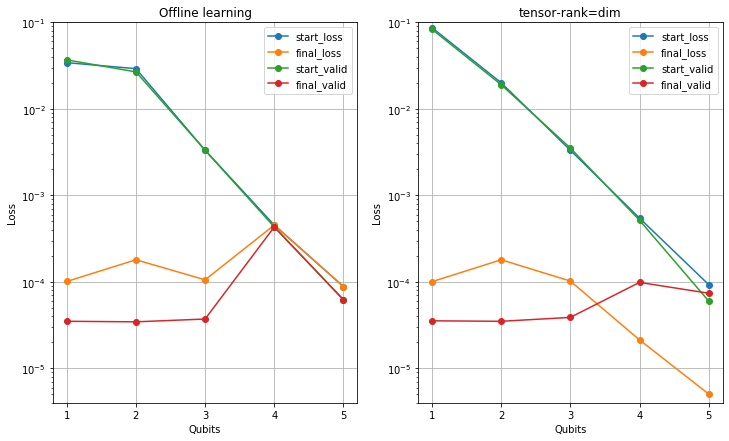

In [6]:
plt.figure(figsize=(12, 7))
plt.subplot(121)
plt.plot(X_off, y_start_loss_off, '-o', label='start_loss');
plt.plot(X_off, y_final_loss_off, '-o', label='final_loss');
plt.plot(X_off, y_start_valid_off, '-o', label='start_valid');
plt.plot(X_off, y_final_valid_off, '-o', label='final_valid');
plt.xticks(range(1, 6), X_off);
plt.xlabel('Qubits')
plt.ylabel('Loss')
plt.yscale('log')
plt.ylim(4e-6,1e-1)
plt.title('Offline learning')
plt.grid()
plt.legend();

plt.subplot(122)
plt.plot(X_rdim, y_start_loss_rdim, '-o', label='start_loss');
plt.plot(X_rdim, y_final_loss_rdim, '-o', label='final_loss');
plt.plot(X_rdim, y_start_valid_rdim, '-o', label='start_valid');
plt.plot(X_rdim, y_final_valid_rdim, '-o', label='final_valid');
plt.xticks(range(1, 6), X_off);
plt.xlabel('Qubits')
plt.ylabel('Loss')
plt.yscale('log')
plt.ylim(4e-6,1e-1)
plt.title('tensor-rank=dim')
plt.grid()
plt.legend();

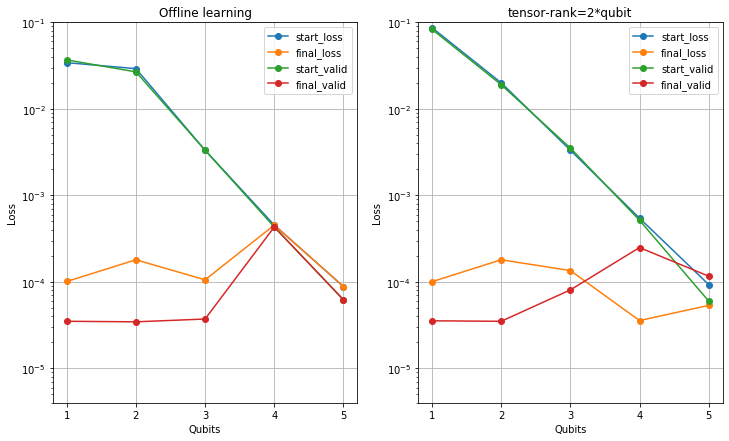

In [7]:
plt.figure(figsize=(12, 7))
plt.subplot(121)
plt.plot(X_off, y_start_loss_off, '-o', label='start_loss');
plt.plot(X_off, y_final_loss_off, '-o', label='final_loss');
plt.plot(X_off, y_start_valid_off, '-o', label='start_valid');
plt.plot(X_off, y_final_valid_off, '-o', label='final_valid');
plt.xticks(range(1, 6), X_off);
plt.xlabel('Qubits')
plt.ylabel('Loss')
plt.yscale('log')
plt.ylim(4e-6,1e-1)
plt.title('Offline learning')
plt.grid()
plt.legend();

plt.subplot(122)
plt.plot(X_rqub, y_start_loss_rqub, '-o', label='start_loss');
plt.plot(X_rqub, y_final_loss_rqub, '-o', label='final_loss');
plt.plot(X_rqub, y_start_valid_rqub, '-o', label='start_valid');
plt.plot(X_rqub, y_final_valid_rqub, '-o', label='final_valid');
plt.xticks(range(1, 6), X_off);
plt.xlabel('Qubits')
plt.ylabel('Loss')
plt.yscale('log')
plt.ylim(4e-6,1e-1)
plt.title('tensor-rank=2*qubit')
plt.grid()
plt.legend();

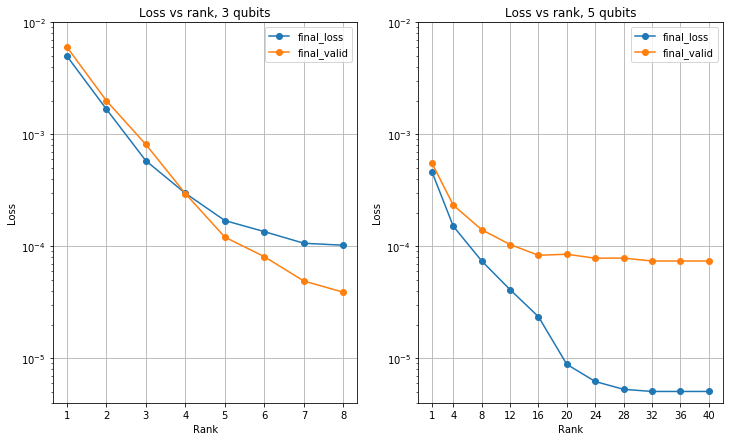

In [8]:
plt.figure(figsize=(12, 7))
plt.subplot(121)
plt.plot(X_r3q, y_final_loss_r3q, '-o', label='final_loss');
plt.plot(X_r3q, y_final_valid_r3q, '-o', label='final_valid');
plt.xticks(X_r3q);
plt.xlabel('Rank')
plt.ylabel('Loss')
plt.yscale('log')
plt.title('Loss vs rank, 3 qubits')
plt.grid()
plt.ylim(4e-6,1e-2)
plt.legend();

plt.subplot(122)
plt.plot(X_r5q, y_final_loss_r5q, '-o', label='final_loss');
plt.plot(X_r5q, y_final_valid_r5q, '-o', label='final_valid');
plt.xticks(X_r5q);
plt.xlabel('Rank')
plt.ylabel('Loss')
plt.yscale('log')
plt.ylim(4e-6,1e-2)
plt.title('Loss vs rank, 5 qubits')
plt.grid()
plt.legend();